# Titanic Dataset with TFLearn

In [21]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
seaborn.set()

import tflearn

We start by downloading the data:

In [2]:
# Download the Titanic dataset
from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv')

Succesfully downloaded titanic_dataset.csv 82865 bytes.


'./titanic_dataset.csv'

In [3]:
# Load CSV file, indicate that the first column represents labels
from tflearn.data_utils import load_csv
data, labels = load_csv('titanic_dataset.csv', target_column=0,
                        categorical_labels=True, n_classes=2)

In [16]:
titanic_data = pd.DataFrame(data, 
                            columns=['pclass', 'name', 'sex',
                                     'age', 'sibsp', 'parch',
                                     'ticket', 'fare'])

In [20]:
titanic_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare
0,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500
2,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500


In [23]:
titanic_data.describe()

,pclass,name,sex,age,sibsp,parch,ticket,fare
count,1309,1309,1309,1309,1309,1309,1309,1309
unique,3,1307,2,99,7,8,929,281
top,3,"Kelly, Mr. James",male,0,0,0,CA. 2343,8.0500
freq,709,2,843,263,891,1002,11,60


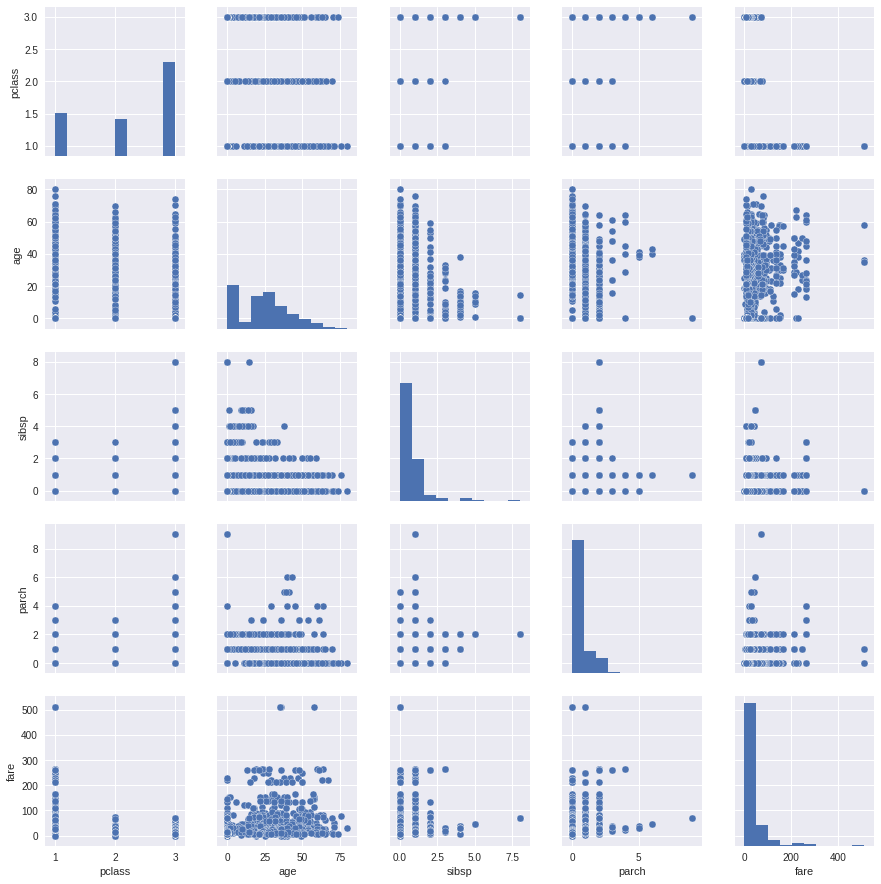

In [41]:
sns.pairplot(titanic_data.ix[:,['pclass', 'age', 'sibsp', 'parch', 'fare']]\
                         .applymap(float))

In [42]:
# Preprocessing function
def preprocess(data, columns_to_ignore):
    # Sort by descending id and delete columns
    for id in sorted(columns_to_ignore, reverse=True):
        [r.pop(id) for r in data]
    for i in range(len(data)):
        # Converting 'sex' field to float (id is 1 after removing labels column)
        data[i][1] = 1. if data[i][1] == 'female' else 0
    return np.array(data, dtype=np.float32)

In [43]:
# Ignore 'name' and 'ticket' columns (id 1 & 6 of data array)
to_ignore=[1, 6]

# Preprocess data
data = preprocess(data, to_ignore)

In [44]:
# Build neural network
net = tflearn.input_data(shape=[None, 6])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

In [45]:
# Define model
model = tflearn.DNN(net)
# Start training (apply gradient descent algorithm)
model.fit(data, labels, n_epoch=10, batch_size=16, show_metric=True)

Training Step: 819  | total loss: 0.51358 | time: 0.495s
| Adam | epoch: 010 | loss: 0.51358 - acc: 0.7581 -- iter: 1296/1309
Training Step: 820  | total loss: 0.52012 | time: 0.509s
| Adam | epoch: 010 | loss: 0.52012 - acc: 0.7385 -- iter: 1309/1309
--


In [46]:
# Let's create some data for DiCaprio and Winslet
dicaprio = [3, 'Jack Dawson', 'male', 19, 0, 0, 'N/A', 5.0000]
winslet = [1, 'Rose DeWitt Bukater', 'female', 17, 1, 2, 'N/A', 100.0000]

# Preprocess data
dicaprio, winslet = preprocess([dicaprio, winslet], to_ignore)

# Predict surviving chances (class 1 results)
pred = model.predict([dicaprio, winslet])

print("DiCaprio Surviving Rate:", pred[0][1])
print("Winslet Surviving Rate:", pred[1][1])

DiCaprio Surviving Rate: 0.14912402629852295
Winslet Surviving Rate: 0.9859868884086609
